# Course-End Project: Sales Analysis

 # <span style='color:green'>  1.	Data Wrangling  </span>

<div class="alert-success">
● Importing Libraries and Data:
</div>

In [2]:
import datetime
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('salsedataset1.csv',encoding='ISO-8859-1', sep=';')
df.head()

,Date,Time,State,Group,Unit,Sales
0,10/1/2020,Morning,WA,Kids,8,20000
1,10/1/2020,Morning,WA,Men,8,20000
2,10/1/2020,Morning,WA,Women,4,10000
3,10/1/2020,Morning,WA,Seniors,15,37500
4,10/1/2020,Afternoon,WA,Kids,3,7500


In [ ]:
df.info()

In [ ]:
df

In [ ]:
df.columns

<div class="alert-success">
●	Ensure that the data is clean and that there is no missing or incorrect data: 
</div>

In [ ]:
df.isna()
# returns TRUE where it detects a missing value

In [ ]:
df.notna()
# returns TRUE, if the data is free from missing

In [ ]:
print(df.isnull().sum())

 # <span style='color:green'>  2.	Data Analysis   </span>

<div class="alert-success">
● Descriptive Statistical Analysis:
</div>

In [ ]:
df.describe()

In [ ]:
df.Sales.mean()

In [ ]:
df.Unit.mean()

In [ ]:
df.Sales.median()

In [ ]:
df.Unit.median()

In [ ]:
df.Sales.mode()

In [ ]:
df.Unit.mode()

In [ ]:
df.Sales.std()

In [ ]:
df.Unit.std()

<div class="alert-success">
● GroupBy:
</div>

In [ ]:
group_sales =df.groupby('Group')['Sales'].sum()
print(group_sales)

# Determine which group is generating the highest sales, and which group is generating the lowest sales.
highest_group_sales = group_sales.idxmax()
lowest_group_sales = group_sales.idxmin()
print("\nGroup Generating Highest Sales:", highest_group_sales)
print("Group Generating Lowest Sales:", lowest_group_sales)

In [ ]:
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)

# Determine which state is generating the highest sales, and which state is generating the lowest sales.
highest_state_sales = state_sales.idxmax()
lowest_state_sales = state_sales.idxmin()
print("\nState Generating Highest Sales:", highest_state_sales)
print("State Generating Lowest Sales:", lowest_state_sales)

<div class="alert-success">
● Share recommendation on the usage of the groupby() function:
</div>

In [ ]:
group_unit= df.groupby('Group')['Unit'].sum()
print(group_unit)

# Determine which group is generating the highest sales, and which state is generating the lowest sales.
highest_group_unit = group_unit.idxmax()
lowest_group_unit = group_unit.idxmin()
print("\nGroup Generating Highest Units:", highest_group_unit)
print("Group Generating Lowest Units:", lowest_group_unit)

In [ ]:
time_sales= df.groupby('Time')['Sales'].sum()
print(time_sales)

# Determine which state is generating the highest sales, and which state is generating the lowest sales.
highest_time_sales = time_sales.idxmax()
lowest_time_sales = time_sales.idxmin()
print("\nTime Generating Highest Sales:", highest_time_sales)
print("Time Generating Lowest Sales:", lowest_time_sales)

<div class="alert-success">
● Generate Daily, Weekly, Monthly, and Quarterly Reports:
</div>

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)

daily_report= df.resample('D')['Sales'].sum()

weekly_report = df.resample('W')['Sales'].sum()

monthly_report = df.resample('M')['Sales'].sum()

quarterly_report = df.resample('Q')['Sales'].sum()


print("\nDaily Report:")
print(daily_report.head())

print("\nWeekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())

<div class="alert-success">
● Data Normalization:
</div>

In [ ]:
normlize= ['Sales','Unit']
scalar = MinMaxScaler()
df[normlize] = scalar.fit_transform(df[normlize])

In [ ]:
df

 # <span style='color:green'>  3.	Data Visualization  </span>

<div class="alert-success">
 State-wise sales analysis for different groups (kids, women, men, and seniors):
</div>

In [ ]:
sns.barplot(x='State', y='Sales' ,hue='Group', data=df, palette='dark:#5A9_r')
plt.title('State-wise Sales Analysis by Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()

<div class="alert-success">
Group-wise sales analysis (kids, women, men, and seniors) across different states:
</div>

In [ ]:
sns.barplot(x='Group', y='Sales' ,hue='State', data=df, palette='dark:#5A9_r')
plt.title('Group-wise Sales Analysis by State')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.show()

<div class="alert-success">
Time-of-the-day analysis:
</div>

In [ ]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=df, x='Time', y='Sales', color='green')
plt.title('Time-of-the-Day Sales Analysis')
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

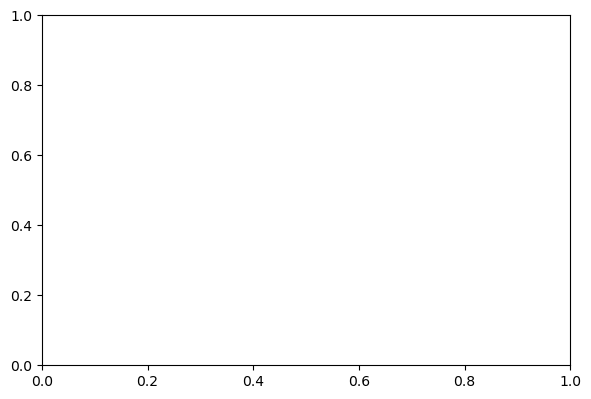

In [4]:
plt.figure(figsize=(15, 10))

# Daily Sales
plt.subplot(2, 2, 1)
df['Sales'].resample('d').sum().plot(kind='line', color='green')
plt.title('Daily Sales')
plt.xticks(rotation=45)

# Weekly Sales
plt.subplot(2, 2, 2)
df['Sales'].resample('w').sum().plot(kind='line', color='green')
plt.title('Weekly Sales')
plt.xticks(rotation=45)


# Monthly Sales
plt.subplot(2, 2, 3)
df['Sales'].resample('m').sum().plot(kind='line', color='green')
plt.title('Monthly Sales')
plt.xticks(rotation=45)


# Quarterly Sales
plt.subplot(2, 2, 4)
df['Sales'].resample('q').sum().plot(kind='bar', color='green')
plt.title('Quarterly Sales')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()